# <div align="center">Análisis exploratorio de datos a la encuesta anual de Stack Overflow.</div>

## <div align="center">El siguiente análisis tiene el fin de encontrar cuales son los lenguajes de programación mas utilizados por jovenes estudiantes de 18 a 24 años de edad asi como cuales son los mas deseados por aprender en Mexico.</div>

<div align="center">La informacion utilizada puede encontrarse en el siguiente link.</div>

<div align="center"> https://insights.stackoverflow.com/survey</div>

# <div align="center"> 1.Analizando la data. </div>

### <div align="center">Comenzaremos por importar las librerias necesarias para llevar nuestro análisis explotario.</div>

In [104]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import pandas as pd

### <div align="center">Importaremos nuestros datos a utilizar, en esta ocasion analizaremos la encuesta anual de Stack Overflow 2021.</div>


In [2]:
survey = pd.read_csv('documents/projects/survey_results_public.csv')

### <div align="center">Con la funcion type podemos ver que hemos importado el archivo como un DataFrame.</div>

In [3]:
type(survey)

pandas.core.frame.DataFrame

### <div align="center">utilizando shape podemos ver que el data frame contiene 23470 renglones y 49 columnas.</div>

In [4]:
survey.shape

(23470, 49)

### <div align="center">Para visualizar el nombre de las columnas y el tipo de datos que estas contienen utilizamos el siguiente codigo. </div>


In [5]:
print(survey.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23470 entries, 0 to 23469
Data columns (total 49 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ResponseId                    23470 non-null  int64  
 1   MainBranch                    23470 non-null  object 
 2   Employment                    23441 non-null  object 
 3   Country                       23470 non-null  object 
 4   US_State                      14920 non-null  object 
 5   UK_Country                    4418 non-null   object 
 6   EdLevel                       23369 non-null  object 
 7   Age1stCode                    23420 non-null  object 
 8   LearnCode                     23361 non-null  object 
 9   YearsCode                     23137 non-null  object 
 10  YearsCodePro                  18403 non-null  object 
 11  DevType                       19444 non-null  object 
 12  OrgSize                       18050 non-null  object 
 13  C

### <div align="center">El siguiente codigo nos da informacion cuantitativa de los valores que tenemos en una columna de nuestro interes. Este es asignado a una variable para ser usado mas adelante.</div>


In [11]:
surveyCountrys = survey['Country'].str.split(';', expand=True).stack().value_counts()
print(surveyCountrys)

United States of America                                15288
United Kingdom of Great Britain and Northern Ireland     4475
Canada                                                   3012
Mexico                                                    695
dtype: int64


In [10]:
surveyAges = survey['Age1stCode'].str.split(';', expand=True).stack().value_counts()
print(surveyAges)

11 - 17 years           12339
5 - 10 years             4867
18 - 24 years            4217
25 - 34 years            1104
35 - 44 years             378
Younger than 5 years      221
45 - 54 years             174
55 - 64 years              93
Older than 64 years        27
dtype: int64


In [12]:
surveyBranch = survey['MainBranch'].str.split(';', expand=True).stack().value_counts()
print(surveyBranch)

I am a developer by profession                                                   16893
I am not primarily a developer, but I write code sometimes as part of my work     2162
I am a student who is learning to code                                            2101
I code primarily as a hobby                                                       1709
I used to be a developer by profession, but no longer am                           442
None of these                                                                      163
dtype: int64


In [21]:
survey['LanguageHaveWorkedWith'].str.split(';', expand=True).stack().value_counts()


Yearly         13286
Python          3579
JavaScript      3165
HTML/CSS        3082
Java            2026
C++             1896
Node.js         1789
SQL             1636
C               1614
Bash/Shell      1609
Monthly         1564
C#              1330
TypeScript      1029
PHP              812
Weekly           761
Rust             740
Assembly         630
PowerShell       553
Go               500
R                396
Matlab           355
Swift            330
Kotlin           328
Ruby             274
Haskell          256
Dart             245
VBA              221
LISP             156
Julia            139
Perl             119
Objective-C      109
Scala             89
Clojure           74
APL               70
Elixir            68
Groovy            57
F#                53
Crystal           42
Erlang            41
Delphi            36
COBOL             33
dtype: int64

### <div align="center">Aqui se puede apreciar que hay valores erroneos en nuestra columna de lenguajes previamente utilizados por lo cual aun no asignaremos una variable sin antes corregir esta informacion. (Yearly,Weekly)</div>        

In [14]:
surveyWant = survey['LanguageWantToWorkWith'].str.split(';', expand=True).stack().value_counts()
print(surveyWant)

JavaScript     14393
HTML/CSS       11978
Python         11204
SQL            10872
Bash/Shell      7745
Node.js         7732
TypeScript      7569
C#              7058
Java            6296
C++             5084
C               3976
PHP             3362
Go              3149
PowerShell      3105
Rust            2858
Ruby            2347
Kotlin          1736
Swift           1506
Assembly        1355
R               1315
VBA             1065
Dart             829
Perl             815
Groovy           783
Clojure          747
Matlab           730
Scala            720
Haskell          715
Elixir           713
Objective-C      700
Julia            510
LISP             475
F#               371
Delphi           305
Erlang           277
Crystal          215
APL              168
COBOL            131
dtype: int64


# <div align="center">2. Limpiando la data.</div>

### <div align="center">La funcion fillna tiene la capacidad de cambiar valores nulos por el valor de nuestra preferencia.</div>

In [15]:
survey.fillna('Missing Value')

,ResponseId,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,YearsCode,...,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,ConvertedCompYearly,Unnamed: 48
0,5,I am a developer by profession,"Independent contractor, freelancer, or self-em...",United Kingdom of Great Britain and Northern I...,Missing Value,England,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5 - 10 years,Friend or family member,17,...,25-34 years old,Man,No,Missing Value,White or of European descent,None of the above,Missing Value,Appropriate in length,Easy,Missing Value
1,6,I am a student who is learning to code,"Student, part-time",United States of America,Georgia,Missing Value,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",Missing Value,...,Prefer not to say,No,Straight / Heterosexual,Prefer not to say,None of the above,I have a concentration and/or memory disorder ...,Too long,Neither easy nor difficult,Missing Value,Missing Value
2,7,I code primarily as a hobby,I prefer not to say,United States of America,New Hampshire,Missing Value,"Secondary school (e.g. American high school, G...",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",3,...,Prefer not to say,No,Missing Value,I don't know,None of the above,None of the above,Appropriate in length,Neither easy nor difficult,Missing Value,Missing Value
3,11,I am a developer by profession,Employed full-time,United Kingdom of Great Britain and Northern I...,Missing Value,England,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc)",16,...,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,Missing Value
4,15,"I used to be a developer by profession, but no...","Not employed, but looking for work",United Kingdom of Great Britain and Northern I...,Missing Value,England,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,School,40,...,Man,No,Prefer not to say,Prefer not to say,None of the above,I have a mood or emotional disorder (e.g. depr...,Appropriate in length,Neither easy nor difficult,Missing Value,Missing Value
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23465,83431,I am a developer by profession,Employed full-time,United States of America,Illinois,Missing Value,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",23,...,45-54 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,125000.0
23466,83433,I am a developer by profession,Employed full-time,Canada,Missing Value,Missing Value,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",18 - 24 years,School,5,...,18-24 years old,Woman,No,Straight / Heterosexual,East Asian,None of the above,None of the above,Appropriate in length,Easy,80169.0
23467,83435,I am a developer by profession,Employed full-time,United States of America,Texas,Missing Value,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",6,...,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,I have a concentration and/or memory disorder ...,Appropriate in length,Easy,160500.0
23468,83437,I am a developer by profession,Employed full-time,United States of America,New Jersey,Missing Value,"Secondary school (e.g. American high school, G...",11 - 17 years,School,10,...,25-34 years old,Man,No,Missing Value,White or of European descent,None of the above,None of the above,Appropriate in length,Neither easy nor difficult,90000.0


### <div align="center">Lo siguiente que haremos sera eliminar los valores erroneos de la Columna "LanguageHaveWorkedWith"</div>

In [23]:
survey.replace({"Yearly": "Invalid data", "Weekly": "Invalid data"}, inplace=True)


In [25]:
surveyHWW = survey['LanguageHaveWorkedWith'].str.split(';', expand=True).stack().value_counts()
print(surveyHWW)

Invalid data    14047
Python           3579
JavaScript       3165
HTML/CSS         3082
Java             2026
C++              1896
Node.js          1789
SQL              1636
C                1614
Bash/Shell       1609
Monthly          1564
C#               1330
TypeScript       1029
PHP               812
Rust              740
Assembly          630
PowerShell        553
Go                500
R                 396
Matlab            355
Swift             330
Kotlin            328
Ruby              274
Haskell           256
Dart              245
VBA               221
LISP              156
Julia             139
Perl              119
Objective-C       109
Scala              89
Clojure            74
APL                70
Elixir             68
Groovy             57
F#                 53
Crystal            42
Erlang             41
Delphi             36
COBOL              33
dtype: int64


### <div align="center">Ahora reduciremos la cantidad de paises a Mexico y personas de 18 a 24 años guardando este nuevo data frame en una variable.</div>


In [58]:
surveyMX = survey[(survey['Country'].str.contains('Mexico')) & (survey['Age1stCode'].str.contains("18 - 24 years")) & (survey['MainBranch'].str.contains("I am a student who is learning to code"))]

In [59]:
type(surveyMX)

pandas.core.frame.DataFrame

In [64]:
surveyMX.head()

,ResponseId,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,YearsCode,...,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,ConvertedCompYearly,Unnamed: 48
3448,9222,I am a student who is learning to code,"Not employed, but looking for work",Mexico,NaN,NaN,Some college/university study without earning ...,18 - 24 years,Online Courses or Certification,4,...,Man,No,Straight / Heterosexual,White or of European descent;Hispanic or Latin...,None of the above,None of the above,Too long,Easy,NaN,NaN
3453,9233,I am a student who is learning to code,"Student, part-time",Mexico,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",18 - 24 years,School;Online Forum;Online Courses or Certific...,5,...,Man,No,Straight / Heterosexual,Hispanic or Latino/a/x,None of the above,Prefer not to say,Too long,Easy,NaN,NaN
3809,10016,I am a student who is learning to code,"Student, full-time",Mexico,NaN,NaN,"Secondary school (e.g. American high school, G...",18 - 24 years,Online Courses or Certification;Colleague;Book...,2,...,Man,No,Straight / Heterosexual,Hispanic or Latino/a/x,None of the above,None of the above,Appropriate in length,Easy,NaN,NaN
6746,22205,I am a student who is learning to code,"Student, full-time",Mexico,NaN,NaN,Some college/university study without earning ...,18 - 24 years,"Other online resources (ex: videos, blogs, etc...",4,...,Man,No,Straight / Heterosexual,Hispanic or Latino/a/x,None of the above,None of the above,Appropriate in length,Easy,NaN,NaN
7713,27419,I am a student who is learning to code,Employed full-time,Mexico,NaN,NaN,"Professional degree (JD, MD, etc.)",18 - 24 years,Online Courses or Certification,5,...,Man,No,NaN,Hispanic or Latino/a/x,None of the above,None of the above,Appropriate in length,Easy,NaN,NaN


### <div align="center">Ahora crearemos un subset con las columnas a utilizar, el proposito de esto es ir enfocando cada vez mas la informacion que queremos analizar.</div>

In [74]:
EDA = surveyMX.loc[:,("MainBranch","Country","Age1stCode","LanguageHaveWorkedWith","LanguageWantToWorkWith")]


### <div align="center">El siguiente codigo tiene la finalidad de ver nuestro nuevo data frame por completo.
</div>

In [79]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
display(EDA)

,MainBranch,Country,Age1stCode,LanguageHaveWorkedWith,LanguageWantToWorkWith
3448,I am a student who is learning to code,Mexico,18 - 24 years,C++;Go;HTML/CSS;Julia;Python;Rust;TypeScript,Go;Python;R;Rust
3453,I am a student who is learning to code,Mexico,18 - 24 years,C;C#;C++;COBOL;Julia;Matlab;Python,NaN
3809,I am a student who is learning to code,Mexico,18 - 24 years,HTML/CSS;Java;JavaScript;Kotlin;Node.js;Python...,C;Go;HTML/CSS;JavaScript;Kotlin;SQL
6746,I am a student who is learning to code,Mexico,18 - 24 years,Bash/Shell;C#;C++;Delphi;Java;LISP;PHP;Python;SQL,C#;C++;Delphi;Python
7713,I am a student who is learning to code,Mexico,18 - 24 years,NaN,NaN
8058,I am a student who is learning to code,Mexico,18 - 24 years,HTML/CSS;Java;JavaScript;Node.js;TypeScript,C;C#;C++;HTML/CSS;Java;JavaScript;Node.js;Type...
8476,I am a student who is learning to code,Mexico,18 - 24 years,HTML/CSS;JavaScript;Perl;PHP;SQL,Assembly;C;C#;COBOL;Dart;Go;Haskell;Java;Kotli...
9035,I am a student who is learning to code,Mexico,18 - 24 years,C#;Java,COBOL;JavaScript;Kotlin
10915,I am a student who is learning to code,Mexico,18 - 24 years,Bash/Shell;PowerShell;Python;R,Bash/Shell;Go;HTML/CSS;JavaScript;Python;R;SQL
11070,I am a student who is learning to code,Mexico,18 - 24 years,HTML/CSS;JavaScript;Node.js;Python;SQL;TypeScript,Dart;Go;HTML/CSS;JavaScript;Node.js;Python;SQL...


### <div align="center"> A continuacion contabilizaremos los totales de nuestro nuevo data frame.</div>


In [80]:
EDAmembers = EDA['Age1stCode'].str.split(';', expand=True).stack().value_counts()
print(EDAmembers)

18 - 24 years    22
dtype: int64


In [70]:
surveyWantMX = EDA['LanguageWantToWorkWith'].str.split(';', expand=True).stack().value_counts()
print(surveyWantMX)

Go            10
JavaScript    10
Python        10
HTML/CSS       9
Kotlin         8
TypeScript     8
Node.js        7
SQL            6
R              6
C++            6
C              5
Java           5
Swift          4
Dart           4
Rust           4
C#             3
Haskell        3
Ruby           3
Assembly       2
Scala          2
Bash/Shell     2
COBOL          2
PHP            2
Delphi         1
dtype: int64


In [71]:
surveyHaveMX = EDA['LanguageHaveWorkedWith'].str.split(';', expand=True).stack().value_counts()
print(surveyHaveMX)

Python        16
JavaScript    14
HTML/CSS      14
Java          12
SQL           10
C++            9
Node.js        8
C#             7
TypeScript     5
Matlab         4
Bash/Shell     4
C              4
R              3
Assembly       3
PHP            3
Haskell        2
Julia          2
PowerShell     1
LISP           1
Ruby           1
Erlang         1
Delphi         1
Perl           1
Kotlin         1
Rust           1
Go             1
COBOL          1
dtype: int64


# <div align="center">3. Visualizar nuestra data
</div>

### <div align="center">Ahora que la informacion ha pasado por un proceso de analisis, limpieza y transformacion es momento de visualizar nuestros datos.</div>

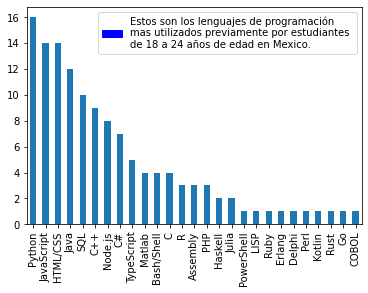

In [103]:
PlotHaveMX = surveyHaveMX.plot(kind='bar')

bluepatch = mpatches.Patch(color='Blue', label='Estos son los lenguajes de programación \nmas utilizados previamente por estudiantes \nde 18 a 24 años de edad en Mexico.')
plt.legend(handles=[bluepatch])

plt.show()


### <div align="center">La siguiente grafica de pastel muestra los 5 idiomas mas utilizados previamente por los estudiantes.</div>

Text(0, 0.5, '')

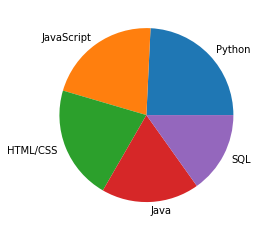

In [130]:
piehave = surveyHaveMX.head(5).plot(kind='pie')
plt.ylabel("")

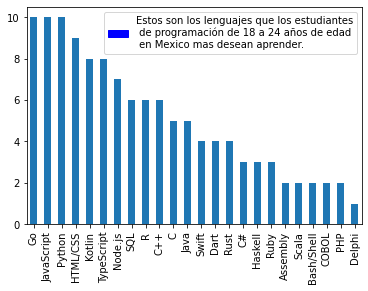

In [102]:
PlotWantMX = surveyWantMX.plot(kind="bar")

bluepatch = mpatches.Patch(color='Blue', label='Estos son los lenguajes que los estudiantes\n de programación de 18 a 24 años de edad\n en Mexico mas desean aprender.')
plt.legend(handles=[bluepatch])

plt.show()

### <div align="center">La siguiente grafica de pastel muestra los 5 idiomas que los estudiantes mas desean aprender.</div>

Text(0, 0.5, '')

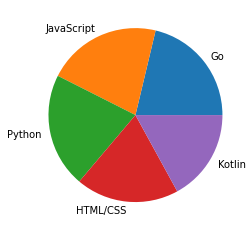

In [129]:
piewant= surveyWantMX.head(5).plot(kind='pie')
plt.ylabel("")

## <div align="center">Con esto podemos llegar a la conclusion de que Python, JavaScript y HTML/CSS son los lenguajes que mas predominan entre los estudiantes que quieren aprenderlo y que ya lo han utilizado antes, por otra parte Go y Kotlin son de los lenguajes menos utilizados y que los estudiantes mas desean aprender.</div>